In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_array= cv2.imread("train-Dataset/close-eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

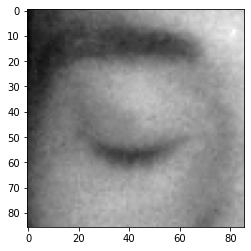

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(86, 86)

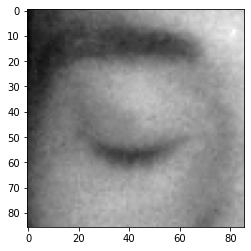

In [6]:
DataDirectory ="train-Dataset/"
classes=["close-eyes","open-eyes"]
for category in classes:
    path= os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

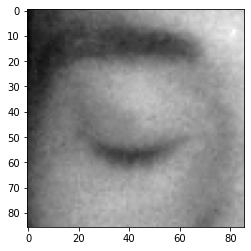

In [8]:
img_size=224
new_array= cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(img_array, cmap="gray")
plt.show()

In [31]:
training_data=[]
def create_training_data():
    for category in classes:
        path= os.path.join(DataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [32]:
create_training_data()

In [33]:
print(len(training_data))

2240


In [ ]:
import random

random.shuffle(training_data)

In [38]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1, img_size, img_size,3)

In [39]:
x.shape

(2240, 224, 224, 3)

In [40]:
#normalizar la data
x= x/255.0;

In [41]:
Y= np.array(y)

In [42]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [43]:
#entrenando la data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
model= tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 2s 0us/step


In [45]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [46]:
base_input= model.layers[0].input

In [49]:
base_output = model.layers[-4].output

In [50]:
Flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
final_output= layers.Activation("sigmoid")(final_output)

In [51]:
new_model= keras.Model(inputs= base_input, outputs=final_output)

In [52]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [53]:
#clasificacion binaria

new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [56]:
new_model.fit(x,Y,epochs=1,validation_split=0.1)

63/63 [==============================] - 108s 2s/step - loss: 0.0648 - accuracy: 0.9702 - val_loss: 5.4968 - val_accuracy: 0.2143


In [57]:
new_model.save("my_model.h5")

In [59]:
new_model = tf.keras.models.load_model("my_model.h5")

In [60]:
#Revisamos la red buscando predicciones

In [94]:
img_array= cv2.imread("s0001_00002_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb,(img_size,img_size))

In [95]:
x_input= np.array(new_array).reshape(1,img_size,img_size,3)

In [96]:
x_input.shape

(1, 224, 224, 3)

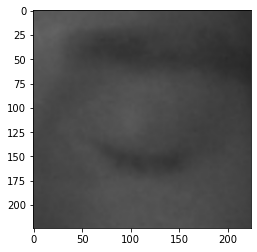

In [97]:
plt.imshow(new_array)

In [98]:
x_input=x_input/255.0

In [99]:
prediction= new_model.predict(x_input)

1/1 [==============================] - 0s 24ms/step


In [100]:
prediction

array([[5.386171e-10]], dtype=float32)

In [75]:
#verificar imagenes
img=cv2.imread("man_face.png")

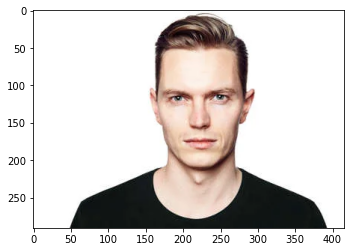

In [76]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [77]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [78]:
eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [79]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [80]:
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

In [81]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)

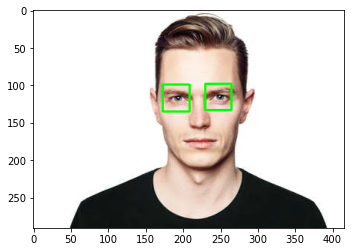

In [82]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [87]:
#Recortando la imagen de los ojos
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = img[y:y+h , x:x+w]
    eyess= eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("Ojos no encontrados")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi= roi_color[ey: ey+eh, ex:ex+ew]

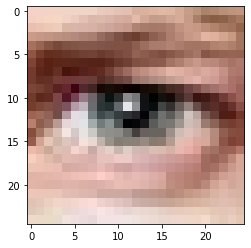

In [88]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [89]:
eyes_roi.shape

(25, 25, 3)

In [90]:
final_image= cv2.resize(eyes_roi,(224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [91]:
final_image.shape

(1, 224, 224, 3)

In [92]:
new_model.predict(final_image)

1/1 [==============================] - 0s 29ms/step


array([[0.83934724]], dtype=float32)

In [101]:
#ejecucion

In [1]:
import cv2
path ="haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap= cv2.VideoCapture(1)
#revisar videocamara
if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("No hay videocamara")
    
while True:
    ret,frame=cap.read()
    eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes= eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess= eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) ==0:
            print("Ojos no encontrados")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi= roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image= cv2.resize(eyes_roi,(224,224))
    final_image= np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    Predictions= new_model.predict(final_image)
    if(Predictions<2):
        status="OJOS ABIERTOS"
    else:
        status="OJOS CERRADOS"
        
        
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #dibujando el rectangulo
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame,status,(50,50), font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow("Tutorial ojos dormilones",frame)
    
    if cv2.waitkey(2) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()
    

NameError: name 'eyes_roi' is not defined